# 投手タイプ別分析

- 主成分分析
- クラスター分析

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA

# データ読み込み
df = pd.read_csv('player_data/pitching.csv')


# 2010年以降のデータを抽出
df_ten = df.query('Year >= 2010')
df_ten.head(10)

,Rk,Name,Age,W,L,W-L%,ERA,G,GS,GF,...,H9,HR9,BB9,SO9,SO/W,League,Team,Year,PlayerID,Throws
12975,1,Katsuyuki Aihara,26.0,0,0,NaN,11.57,2,0.0,0.0,...,7.7,0.0,0.0,11.6,NaN,Japan Pacific League,Chiba Lotte Marines,2010,aihara001kat,right
12976,2,Bryan Corey,36.0,4,4,0.500,4.87,14,8.0,2.0,...,9.7,1.6,3.5,6.1,1.76,Japan Pacific League,Chiba Lotte Marines,2010,corey-001bry,right
12977,3,Takuya Furuya*,28.0,3,0,1.000,2.91,58,0.0,14.0,...,7.8,0.6,4.9,8.4,1.73,Japan Pacific League,Chiba Lotte Marines,2010,furuya001tak,left
12978,4,Kentaro Hashimoto,30.0,0,1,0.000,6.35,9,0.0,1.0,...,6.4,1.6,6.4,7.9,1.25,Japan Pacific League,Chiba Lotte Marines,2010,hashim001ken,right
12979,5,Yasutaka Hattori*,27.0,0,0,NaN,14.29,8,0.0,0.0,...,23.8,0.0,6.4,7.9,1.25,Japan Pacific League,Chiba Lotte Marines,2010,hattor001yas,left
12980,6,Yoshihiro Ito,28.0,1,2,0.333,3.48,65,0.0,15.0,...,7.7,0.3,3.6,9.0,2.50,Japan Pacific League,Chiba Lotte Marines,2010,ito---001yos,right
12981,7,Yuki Karakawa,20.0,6,3,0.667,2.71,11,11.0,0.0,...,8.5,0.4,2.5,6.3,2.55,Japan Pacific League,Chiba Lotte Marines,2010,karaka001yuk,right
12982,8,Ryoji Katsuki,26.0,1,1,0.500,10.45,3,3.0,0.0,...,20.0,0.9,3.5,5.2,1.50,Japan Pacific League,Chiba Lotte Marines,2010,katsuk002ryo,right
12983,9,Hidetaka Kawagoe,37.0,3,2,0.600,7.36,15,4.0,3.0,...,15.0,1.2,0.9,4.3,4.67,Japan Pacific League,Chiba Lotte Marines,2010,kawago001hid,right
12984,10,Hiroyuki Kobayashi,32.0,3,3,0.500,2.21,57,0.0,50.0,...,7.5,0.3,2.1,7.8,3.79,Japan Pacific League,Chiba Lotte Marines,2010,kobaya001hir,right


In [2]:
df.columns

Index(['Rk', 'Name', 'Age', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG',
       'SHO', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK',
       'WP', 'BF', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'League', 'Team',
       'Year', 'PlayerID', 'Throws'],
      dtype='object')

## 主成分分析

In [3]:
df_ten_main = df_ten[['W-L%','ERA', 'IP', 'H9', 'HR9','SO9', 'BB9', 'WHIP']]

# 欠損値を含む行を削除
df_ten_main = df_ten_main.dropna().reset_index(drop=True)


# from pandas import plotting
# plotting.scatter_matrix(df_ten_main, figsize=(8,8), alpha=0.5)
# plt.show()

In [4]:
# 行列の標準化
dfs_ten_main = df_ten_main.apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs_ten_main

,W-L%,ERA,IP,H9,HR9,SO9,BB9,WHIP
0,0.145801,0.154430,-0.306473,0.150979,0.718380,-0.351239,-0.066852,0.067885
1,1.800434,-0.474420,-0.079902,-0.476889,-0.327102,0.701888,0.508501,-0.068516
2,-1.508833,0.629276,-1.100492,-0.939528,0.718380,0.472948,1.124951,-0.045433
3,-0.406847,-0.291540,0.103805,-0.509935,-0.640747,0.976617,-0.025756,-0.379091
4,0.698448,-0.538588,0.283429,-0.245569,-0.536199,-0.259663,-0.477819,-0.450440
...,...,...,...,...,...,...,...,...
2481,-0.128868,-0.384584,0.691665,-0.807346,0.509284,0.793464,0.385211,-0.345516
2482,1.800434,-0.740719,-1.039257,-1.005620,0.091091,2.075532,-0.231239,-0.830264
2483,-1.508833,-0.769595,-0.753491,-0.807346,-0.118006,0.656100,1.289338,0.139233
2484,1.102179,-0.474420,2.263374,-0.642117,-0.536199,1.434498,-0.190142,-0.576348


In [5]:
# 主成分分析
pca = PCA(random_state=42)
pca.fit(dfs_ten_main)

# データを主成分空間に写像
feature = pca.transform(dfs_ten_main)

## 主成分得点

In [6]:
pca_score = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs_ten_main.columns))])
pca_score.tail(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
2476,-1.211906,-0.628430,1.269267,-0.125686,0.088209,-0.154607,0.062351,0.002032
2477,-1.017829,1.098319,0.338143,0.975868,-0.734895,0.035110,0.003055,0.003624
2478,-0.698051,0.416811,1.161581,0.069841,0.102119,0.276539,-0.140290,0.001785
2479,-0.186319,-0.490701,-0.862325,-0.512691,0.838297,0.262988,-0.404327,-0.009347
2480,-0.697264,0.709348,0.756455,0.591837,0.861882,0.397793,-0.014797,-0.006143
2481,-0.717311,-0.087700,0.769410,0.162493,-0.665858,0.912093,0.188495,0.003454
2482,-1.831613,-0.916366,1.852041,0.866840,1.594439,0.147429,0.021759,0.007177
2483,0.187856,-1.543283,0.645875,-1.376094,-0.519725,0.853556,0.698449,-0.016637
2484,-2.106883,0.134333,0.683448,1.626159,-1.448162,-0.140046,-0.056920,-0.012493
2485,5.377467,0.054356,0.436124,0.116188,-0.263268,0.143312,1.011575,-0.002517


In [7]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=dfs_ten_main.columns[0:], index=["PC{}".format(x + 1) for x in range(len(dfs_ten_main.columns))])

,W-L%,ERA,IP,H9,HR9,SO9,BB9,WHIP
PC1,-0.259034,0.476496,-0.247373,0.435020,0.284008,-0.182093,0.320706,0.488618
PC2,-0.032307,0.059029,0.356835,0.287318,0.563559,-0.229879,-0.626100,-0.152132
PC3,-0.104838,0.095255,-0.136295,0.002222,0.352225,0.911509,-0.070633,-0.038128
PC4,0.822430,0.179629,0.397551,0.118028,0.078395,0.131073,0.226208,0.211822
PC5,0.491912,-0.076817,-0.794339,0.019718,0.194994,-0.151111,-0.218509,-0.110250
PC6,-0.041247,-0.034184,0.057315,-0.586219,0.623382,-0.204928,0.438842,-0.164344
PC7,-0.028224,-0.849151,0.024354,0.311042,0.211905,0.033737,0.178409,0.320833
PC8,-0.000057,0.000118,-0.000297,-0.522955,-0.000339,-0.000230,-0.420510,0.741410


各固有ベクトルの値をみると，PC1は「ERA, H9, HR9, BB9, WHIP」が高い．つまり，よく打たれてよく四球も出す防御率が悪いタイプといえる．PC2は「SO9, BB9」が高く，「H9，HR9」が低いことから球に力がある大味な投手タイプといえる．PC3は，「SO9」が高く，「BB9」が低いことからコントロールの良い投手タイプであると言える．

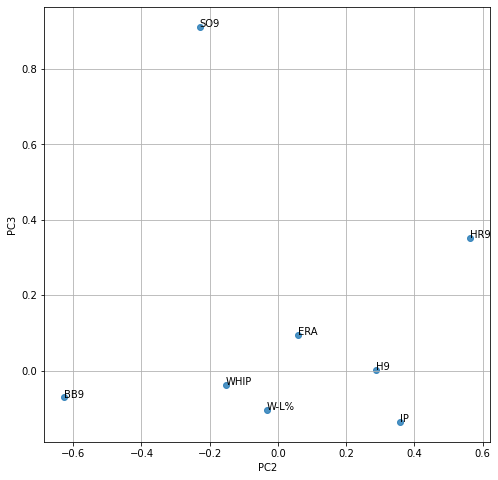

In [8]:
plt.figure(figsize=(8,8))
for x, y, name in zip(pca.components_[1], pca.components_[2], dfs_ten_main.columns):
    plt.text(x, y, name)
plt.scatter(pca.components_[1], pca.components_[2], alpha=0.8)
plt.grid()
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()

## 寄与率

In [9]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs_ten_main.columns))])

,0
PC1,0.471023
PC2,0.136877
PC3,0.115042
PC4,0.101611
PC5,0.095624
PC6,0.062316
PC7,0.017500
PC8,0.000006


In [17]:
mask1 = (pca_score['PC1'] > pca_score['PC2']) & (pca_score['PC1'] > pca_score['PC3'])
mask2 = (pca_score['PC2'] > pca_score['PC3']) & (pca_score['PC2'] > pca_score['PC1'])
mask3 = (pca_score['PC3'] > pca_score['PC2']) & (pca_score['PC3'] > pca_score['PC1'])

pca_score.loc[mask1, 'class'] = 1
pca_score.loc[mask2, 'class'] = 2
pca_score.loc[mask3, 'class'] = 3

pca_score['class'] = pca_score['class'].astype('int8')

# データフレームに結合
df_ten_main['class'] = pca_score['class']
pd.merge()
pca_score.iloc[:,:3]

,PC1,PC2,PC3
0,0.457023,0.455546,-0.023462
1,-0.971230,-0.905343,0.267145
2,1.010689,-0.978037,0.972428
3,-0.834344,-0.625343,0.680383
4,-1.092831,0.101423,-0.538325
...,...,...,...
2481,-0.717311,-0.087700,0.769410
2482,-1.831613,-0.916366,1.852041
2483,0.187856,-1.543283,0.645875
2484,-2.106883,0.134333,0.683448


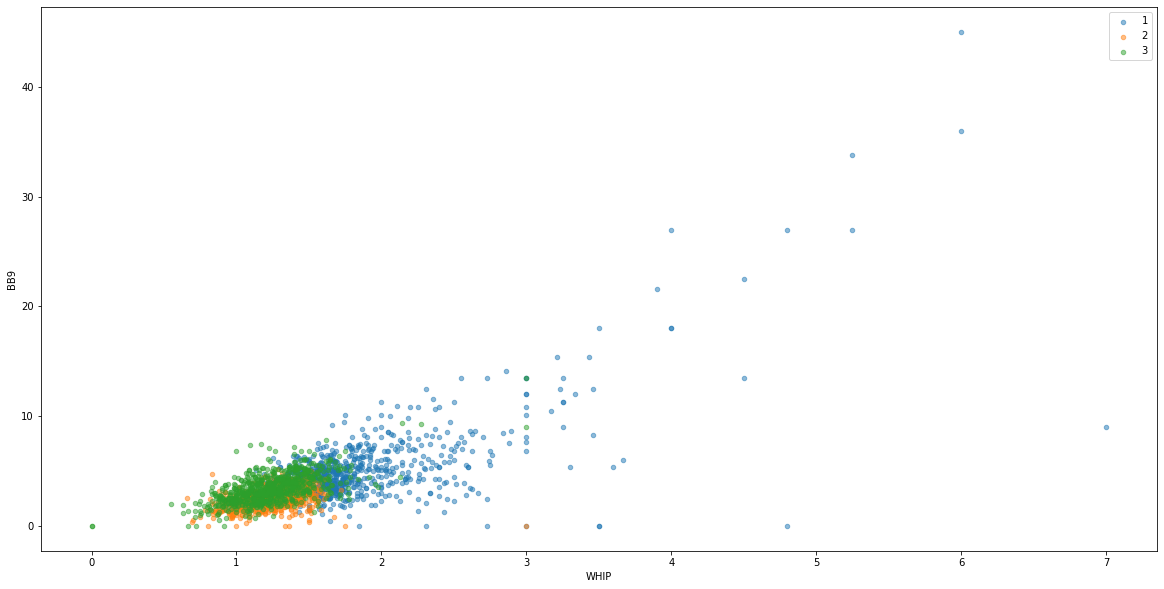

In [11]:
# from pandas import plotting
# plotting.scatter_matrix(df_ten_main, figsize=(12,12),c = df_ten_main['class'], alpha=0.5)
# plt.show()

%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for i, (name, group) in enumerate(df_ten_main.groupby('class')):
    group.plot.scatter(x='WHIP', y='BB9', c=[plt.get_cmap('tab10').colors[i]],alpha=0.5, label=name, ax=ax)